In [86]:
import random
random.seed(1)

import numpy as np
np.random.seed(1)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import tensorflow as tf

### Input

In [87]:
query_1 = "dog"

bing_search_results = [
    "Dog - Wikipedia",
    "Adopting a dog or puppy | RSPCA Australia",
    "dog | History, Domestication, Physical Traits, & Breeds",
    "New South Wales | Dogs & Puppies | Gumtree Australia Free",
    "dog - Wiktionary"
]

In [88]:
query_2 = "what is a dog"

google_search_results = [
    "Dog - Wikipedia",
    "Dog - Simple English Wikipedia, the free encyclopedia",
    "Dog | National Geographic",
    "dog | History, Domestication, Physical Traits, & Breeds",
    "What is a Dog | Facts About Dogs | DK Find Out"
]

In [89]:
relevance_grades = tf.constant([
    [3.0, 2.0, 2.0, 2.0, 1.0],
    [3.0, 3.0, 1.0, 1.0, 0.0]
])

The number of words in our queries and documents can vary. It follows that the number of word embeddings that make up the queries and documents can vary.

In [90]:
combined_texts = [query_1, *bing_search_results, query_2, *google_search_results]

tokeniser = tf.keras.preprocessing.text.Tokenizer()
tokeniser.fit_on_texts(combined_texts)

# we add one here to account for the padding word
vocab_size = max(tokeniser.index_word) + 1
print(vocab_size)

35


In [91]:
for idx, word in tokeniser.index_word.items():
    print(f"index {idx} - {word}")

index 1 - dog
index 2 - wikipedia
index 3 - a
index 4 - australia
index 5 - history
index 6 - domestication
index 7 - physical
index 8 - traits
index 9 - breeds
index 10 - dogs
index 11 - free
index 12 - what
index 13 - is
index 14 - adopting
index 15 - or
index 16 - puppy
index 17 - rspca
index 18 - new
index 19 - south
index 20 - wales
index 21 - puppies
index 22 - gumtree
index 23 - wiktionary
index 24 - simple
index 25 - english
index 26 - the
index 27 - encyclopedia
index 28 - national
index 29 - geographic
index 30 - facts
index 31 - about
index 32 - dk
index 33 - find
index 34 - out


In [92]:
EMBEDDING_DIMS = 2

embeddings = np.random.randn(vocab_size, EMBEDDING_DIMS).astype(np.float32)

print(embeddings)

[[ 1.6243454  -0.6117564 ]
 [-0.5281718  -1.0729686 ]
 [ 0.86540765 -2.3015387 ]
 [ 1.7448118  -0.7612069 ]
 [ 0.3190391  -0.24937038]
 [ 1.4621079  -2.0601406 ]
 [-0.3224172  -0.38405436]
 [ 1.1337694  -1.0998913 ]
 [-0.1724282  -0.8778584 ]
 [ 0.04221375  0.58281523]
 [-1.1006192   1.1447237 ]
 [ 0.9015907   0.50249434]
 [ 0.90085596 -0.68372786]
 [-0.12289023 -0.93576944]
 [-0.26788807  0.53035545]
 [-0.69166076 -0.39675352]
 [-0.6871727  -0.84520566]
 [-0.6712461  -0.0126646 ]
 [-1.1173104   0.2344157 ]
 [ 1.6598022   0.74204415]
 [-0.19183555 -0.887629  ]
 [-0.7471583   1.6924546 ]
 [ 0.05080776 -0.6369957 ]
 [ 0.19091548  2.1002553 ]
 [ 0.12015896  0.6172031 ]
 [ 0.30017033 -0.35224986]
 [-1.1425182  -0.34934273]
 [-0.20889424  0.5866232 ]
 [ 0.8389834   0.9311021 ]
 [ 0.2855873   0.8851412 ]
 [-0.7543979   1.2528682 ]
 [ 0.5129298  -0.29809284]
 [ 0.48851815 -0.07557172]
 [ 1.1316293   1.5198169 ]
 [ 2.1855755  -1.3964963 ]]


In [93]:
query_1_embedding_index = tokeniser.texts_to_sequences([query_1])
query_1_embeddings = np.array([embeddings[x] for x in query_1_embedding_index])

print(query_1_embeddings)

[[[-0.5281718 -1.0729686]]]


In [94]:
query_2_embedding_indices = tokeniser.texts_to_sequences([query_2])
query_2_embeddings = np.array([embeddings[x] for x in query_2_embedding_indices])

print(query_2_embeddings)

[[[ 0.90085596 -0.68372786]
  [-0.12289023 -0.93576944]
  [ 1.7448118  -0.7612069 ]
  [-0.5281718  -1.0729686 ]]]


We can aggregate our embedding vectors!

In [95]:
query_2_embeddings_avg = tf.reduce_mean(query_2_embeddings, axis=1, keepdims=True).numpy()

print(query_2_embeddings_avg)

[[[ 0.49865144 -0.8634182 ]]]


In [96]:
#  new array out of the fixed-sized representations of our queries
query_embeddings = np.row_stack([query_1_embeddings, query_2_embeddings_avg])

In [97]:
query_embeddings

array([[[-0.5281718 , -1.0729686 ]],

       [[ 0.49865144, -0.8634182 ]]], dtype=float32)

In [98]:
print(query_embeddings.shape)

(2, 1, 2)


 We now have an array of dimensions `(number of queries, 1, embedding dimensions)`, where the “1” represents the number of embedding vectors we have per query after we averaged them

In [99]:
# same approach for our documents
docs_sequences = []
for docs_list in [bing_search_results, google_search_results]:
    docs_sequences.append(tokeniser.texts_to_sequences(docs_list))

docs_embeddings = []
for docs_set in docs_sequences:
    this_docs_set = []
    for doc in docs_set:
        this_doc_embeddings = np.array([embeddings[idx] for idx in doc])
        this_docs_set.append(this_doc_embeddings)
    docs_embeddings.append(this_docs_set)

In [100]:
for embeddings in docs_embeddings[0]:
    print()
    print(embeddings)


[[-0.5281718  -1.0729686 ]
 [ 0.86540765 -2.3015387 ]]

[[-0.26788807  0.53035545]
 [ 1.7448118  -0.7612069 ]
 [-0.5281718  -1.0729686 ]
 [-0.69166076 -0.39675352]
 [-0.6871727  -0.84520566]
 [-0.6712461  -0.0126646 ]
 [ 0.3190391  -0.24937038]]

[[-0.5281718  -1.0729686 ]
 [ 1.4621079  -2.0601406 ]
 [-0.3224172  -0.38405436]
 [ 1.1337694  -1.0998913 ]
 [-0.1724282  -0.8778584 ]
 [ 0.04221375  0.58281523]]

[[-1.1173104   0.2344157 ]
 [ 1.6598022   0.74204415]
 [-0.19183555 -0.887629  ]
 [-1.1006192   1.1447237 ]
 [-0.7471583   1.6924546 ]
 [ 0.05080776 -0.6369957 ]
 [ 0.3190391  -0.24937038]
 [ 0.9015907   0.50249434]]

[[-0.5281718  -1.0729686 ]
 [ 0.19091548  2.1002553 ]]


In [101]:
for embeddings in docs_embeddings[1]:
    print()
    print(embeddings)


[[-0.5281718  -1.0729686 ]
 [ 0.86540765 -2.3015387 ]]

[[-0.5281718  -1.0729686 ]
 [ 0.12015896  0.6172031 ]
 [ 0.30017033 -0.35224986]
 [ 0.86540765 -2.3015387 ]
 [-1.1425182  -0.34934273]
 [ 0.9015907   0.50249434]
 [-0.20889424  0.5866232 ]]

[[-0.5281718 -1.0729686]
 [ 0.8389834  0.9311021]
 [ 0.2855873  0.8851412]]

[[-0.5281718  -1.0729686 ]
 [ 1.4621079  -2.0601406 ]
 [-0.3224172  -0.38405436]
 [ 1.1337694  -1.0998913 ]
 [-0.1724282  -0.8778584 ]
 [ 0.04221375  0.58281523]]

[[ 0.90085596 -0.68372786]
 [-0.12289023 -0.93576944]
 [ 1.7448118  -0.7612069 ]
 [-0.5281718  -1.0729686 ]
 [-0.7543979   1.2528682 ]
 [ 0.5129298  -0.29809284]
 [-1.1006192   1.1447237 ]
 [ 0.48851815 -0.07557172]
 [ 1.1316293   1.5198169 ]
 [ 2.1855755  -1.3964963 ]]


In [102]:
docs_averaged_embeddings = []
for docs_set in docs_embeddings:
    this_docs_set = []
    for doc in docs_set:
        this_docs_set.append(tf.reduce_mean(doc, axis=0, keepdims=True))
    concatenated_docs_set = tf.concat(this_docs_set, axis=0).numpy()
    docs_averaged_embeddings.append(concatenated_docs_set)

docs_averaged_embeddings = np.array(docs_averaged_embeddings)

In [103]:
docs_averaged_embeddings

array([[[ 0.16861793, -1.6872537 ],
        [-0.11175551, -0.4011163 ],
        [ 0.269179  , -0.81868297],
        [-0.02821046,  0.31776717],
        [-0.16862816,  0.5136433 ]],

       [[ 0.16861793, -1.6872537 ],
        [ 0.04396335, -0.3385399 ],
        [ 0.19879965,  0.24775822],
        [ 0.269179  , -0.81868297],
        [ 0.44582415, -0.1306425 ]]], dtype=float32)

In [104]:
# (number of queries, number of documents per query, embedding dimensions)
print(docs_averaged_embeddings.shape)

(2, 5, 2)


In [105]:
# copy the fixed-size representation of our query “n documents times”
NUM_DOCS_PER_QUERY = 5

expanded_queries = tf.gather(query_embeddings, [0 for x in range(NUM_DOCS_PER_QUERY)], axis=1).numpy()

print(expanded_queries)

[[[-0.5281718  -1.0729686 ]
  [-0.5281718  -1.0729686 ]
  [-0.5281718  -1.0729686 ]
  [-0.5281718  -1.0729686 ]
  [-0.5281718  -1.0729686 ]]

 [[ 0.49865144 -0.8634182 ]
  [ 0.49865144 -0.8634182 ]
  [ 0.49865144 -0.8634182 ]
  [ 0.49865144 -0.8634182 ]
  [ 0.49865144 -0.8634182 ]]]


In [106]:
expanded_batch = np.concatenate([expanded_queries, docs_averaged_embeddings], axis=-1)

print(expanded_batch)

[[[-0.5281718  -1.0729686   0.16861793 -1.6872537 ]
  [-0.5281718  -1.0729686  -0.11175551 -0.4011163 ]
  [-0.5281718  -1.0729686   0.269179   -0.81868297]
  [-0.5281718  -1.0729686  -0.02821046  0.31776717]
  [-0.5281718  -1.0729686  -0.16862816  0.5136433 ]]

 [[ 0.49865144 -0.8634182   0.16861793 -1.6872537 ]
  [ 0.49865144 -0.8634182   0.04396335 -0.3385399 ]
  [ 0.49865144 -0.8634182   0.19879965  0.24775822]
  [ 0.49865144 -0.8634182   0.269179   -0.81868297]
  [ 0.49865144 -0.8634182   0.44582415 -0.1306425 ]]]


### Hidden Layer

In [107]:
dense_1 = tf.keras.layers.Dense(units=3, activation='relu')
dense_1_out = dense_1(expanded_batch)

print(dense_1_out)

tf.Tensor(
[[[1.2417188  0.         1.6143824 ]
  [0.69959825 0.5673208  0.5637234 ]
  [0.89979136 0.11265749 1.063999  ]
  [0.41662398 0.68811244 0.10836431]
  [0.3259084  0.8671226  0.        ]]

 [[0.72267807 0.47369942 2.2967238 ]
  [0.16830915 0.95225495 1.287926  ]
  [0.         0.9731457  0.96414864]
  [0.38075066 0.6199826  1.7463405 ]
  [0.11798272 0.64902914 1.363599  ]]], shape=(2, 5, 3), dtype=float32)


### Output layer

In [108]:
scores = tf.keras.layers.Dense(units=1, activation='linear')
scores_out = scores(dense_1_out)

print(scores_out)

tf.Tensor(
[[[ 1.5075406 ]
  [ 0.45014748]
  [ 0.9848266 ]
  [ 0.01106296]
  [-0.13460445]]

 [[ 1.7980417 ]
  [ 0.7910408 ]
  [ 0.5017394 ]
  [ 1.2672828 ]
  [ 0.909991  ]]], shape=(2, 5, 1), dtype=float32)


### Calculate KL divergence

In [109]:
scores_for_softmax = tf.squeeze(scores_out, axis=-1)
scores_prob_dist = tf.nn.softmax(scores_for_softmax, axis=-1)

print(scores_prob_dist)

tf.Tensor(
[[0.42413294 0.14732689 0.25147235 0.09497079 0.08209704]
 [0.37900758 0.13845637 0.10367426 0.22291653 0.15594533]], shape=(2, 5), dtype=float32)


In [110]:
relevance_grades_prob_dist = tf.nn.softmax(relevance_grades, axis=-1)

print(relevance_grades_prob_dist)

tf.Tensor(
[[0.44663328 0.1643072  0.1643072  0.1643072  0.06044524]
 [0.4309495  0.4309495  0.05832267 0.05832267 0.02145571]], shape=(2, 5), dtype=float32)


In [111]:
loss = tf.keras.losses.KLDivergence()
batch_loss = loss(relevance_grades_prob_dist, scores_prob_dist)

print(batch_loss)

tf.Tensor(0.21650001, shape=(), dtype=float32)


In [112]:
per_example_loss = tf.reduce_sum(
    relevance_grades_prob_dist * tf.math.log(relevance_grades_prob_dist / scores_prob_dist),
    axis=-1
)

print(per_example_loss)

tf.Tensor([0.04264368 0.39035633], shape=(2,), dtype=float32)


In [113]:
batch_loss = tf.reduce_mean(per_example_loss)

print(batch_loss)

tf.Tensor(0.21650001, shape=(), dtype=float32)


## A toy ListNet implemenetation

In [114]:
NUM_DOCS_PER_QUERY = 5
EMBEDDING_DIMS = 2

In [115]:
class ExpandBatchLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ExpandBatchLayer, self).__init__(**kwargs)

    def call(self, input):
        queries, docs = input
        batch, num_docs, embedding_dims = tf.unstack(tf.shape(docs))
        expanded_queries = tf.gather(queries, tf.zeros([num_docs], tf.int32), axis=1)
        return tf.concat([expanded_queries, docs], axis=-1)

In [116]:
query_input = tf.keras.layers.Input(shape=(1, EMBEDDING_DIMS, ), dtype=tf.float32, name='query')
docs_input = tf.keras.layers.Input(shape=(NUM_DOCS_PER_QUERY, EMBEDDING_DIMS, ), dtype=tf.float32,
                name='docs')

expand_batch = ExpandBatchLayer(name='expand_batch')
dense_1 = tf.keras.layers.Dense(units=3, activation='linear', name='dense_1')
dense_out = tf.keras.layers.Dense(units=1, activation='linear', name='scores')
scores_prob_dist = tf.keras.layers.Dense(units=NUM_DOCS_PER_QUERY, activation='softmax',
                      name='scores_prob_dist')

expanded_batch = expand_batch([query_input, docs_input])
dense_1_out = dense_1(expanded_batch)
scores = tf.keras.layers.Flatten()(dense_out(dense_1_out))
model_out = scores_prob_dist(scores)

model = tf.keras.models.Model(inputs=[query_input, docs_input], outputs=[model_out])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.9),
              loss=tf.keras.losses.KLDivergence())

In [117]:
hist = model.fit(
    [query_embeddings, docs_averaged_embeddings],
    relevance_grades_prob_dist,
    epochs=50,
    verbose=False
)

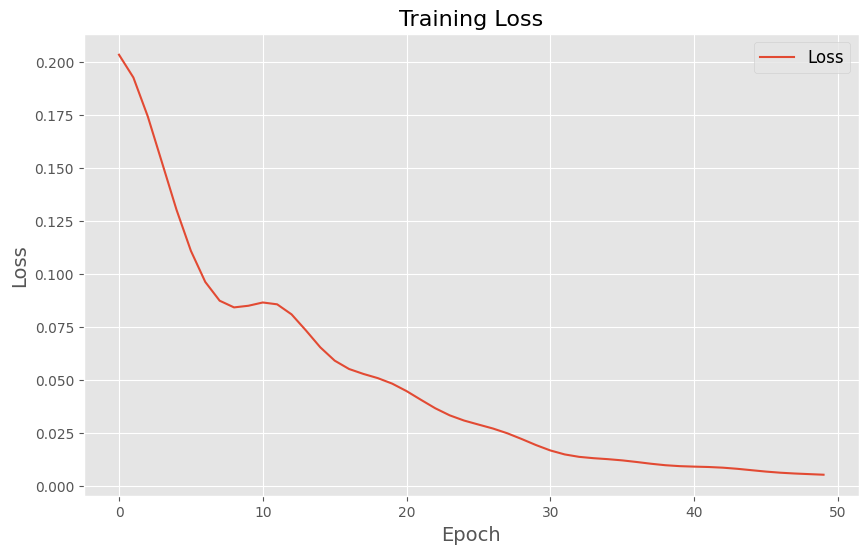

In [118]:
loss = hist.history['loss']

plt.figure(figsize=(10, 6))
plt.plot(loss, label='Loss')

plt.title("Training Loss", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend(fontsize=12)

plt.show()

In [119]:
output_score = model.predict([query_embeddings, docs_averaged_embeddings])

1/1 [==============================] - 0s 146ms/step


In [120]:
output_score

array([[0.43386137, 0.1769879 , 0.1754174 , 0.16677071, 0.04696265],
       [0.4296334 , 0.43365234, 0.04276722, 0.0549628 , 0.03898421]],
      dtype=float32)

In [121]:
np.array(relevance_grades_prob_dist)

array([[0.44663328, 0.1643072 , 0.1643072 , 0.1643072 , 0.06044524],
       [0.4309495 , 0.4309495 , 0.05832267, 0.05832267, 0.02145571]],
      dtype=float32)

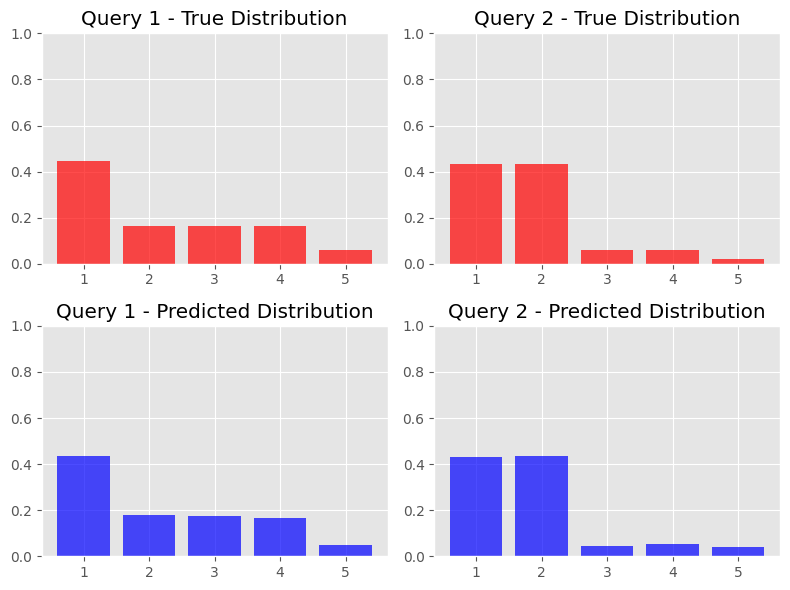

In [122]:
categories = ['1', '2', '3', '4', '5']
x = np.arange(len(categories))  # the label locations

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot for Query 1 True Distribution
axs[0, 0].bar(x, relevance_grades_prob_dist[0], color='r', alpha=0.7, label='True')
axs[0, 0].set_title('Query 1 - True Distribution')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(categories)
axs[0, 0].set_ylim([0, 1])

# Plot for Query 2 True Distribution
axs[0, 1].bar(x, relevance_grades_prob_dist[1], color='r', alpha=0.7, label='True')
axs[0, 1].set_title('Query 2 - True Distribution')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(categories)
axs[0, 1].set_ylim([0, 1])

# Plot for Query 1 Predicted Distribution
axs[1, 0].bar(x, output_score[0], color='b', alpha=0.7, label='Predicted')
axs[1, 0].set_title('Query 1 - Predicted Distribution')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(categories)
axs[1, 0].set_ylim([0, 1])

# Plot for Query 2 Predicted Distribution
axs[1, 1].bar(x, output_score[1], color='b', alpha=0.7, label='Predicted')
axs[1, 1].set_title('Query 2 - Predicted Distribution')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(categories)
axs[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()